# Extract patches

Test the patch extraction on an image.

In [4]:
import jax.numpy as jnp
from PIL import Image
import matplotlib.pyplot as plt

from scripts.utils import extract_patches, compute_indices_from_n_blocks

In [13]:
img = Image.open('/home/nus/Downloads/optical_sar_data/optical.png')

img = jnp.array(img) / 255.0
H, W = img.shape[:2]

print(f"Image shape: {img.shape}")

Image shape: (256, 256, 3)


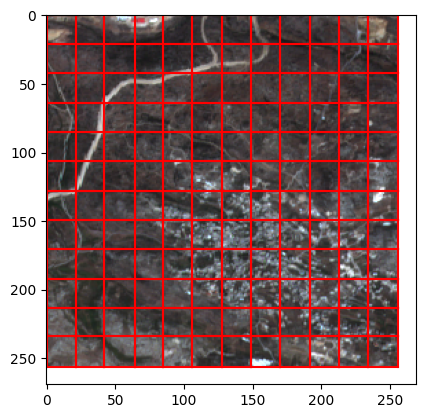

In [9]:
n_blocks = 12

start_indices, end_indices = compute_indices_from_n_blocks(n_blocks=n_blocks, H=H, W=W, padding=0)

plt.imshow(img)
for start, end in zip(start_indices, end_indices):
    start_y, start_x = start
    end_y, end_x = end
    plt.plot([start_x, end_x], [start_y, start_y], color='red')
    plt.plot([start_x, start_x], [start_y, end_y], color='red')
    plt.plot([end_x, end_x], [start_y, end_y], color='red')
    plt.plot([start_x, end_x], [end_y, end_y], color='red')

In [12]:
radius = 2
kernel_size = 2 * radius + 1
start = start_indices[0]
end = end_indices[0]

patches = extract_patches(tensor=img, kernel_size=kernel_size, start_index=start, end_indices=end)

print(f"Extracted patches shape: {patches.shape}")

Extracted patches shape: (21, 21, 5, 5, 3)
